# Ensemble Model - Voting, Stacking, Bagging

In [1]:
'''Import libraries'''
from functions import model_evaluation
from functions import load_data
from ensemble_functions import ensemble_accuracy
from ensemble_functions import ensemble_train_model
from ensemble_functions import save_ensemble_model
from ensemble_functions import load_ensemble_model
from ensemble_functions import ensemble_results
from ensemble_functions import ensemble_plots

import time
import re

from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier

from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import pickle

In [2]:
X_train, X_test, y_train, y_test=load_data(data_train='../Data/train_hog.csv',data_test='../Data/test_hog.csv',scale=0)

In [3]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Define Base Learners

In [5]:
#Test 1-LGBM-KNN, Test 2-LGBM-KNN-LR
clf1 = lgb.LGBMClassifier(learning_rate=0.02375374380489134, max_depth=11, min_child_samples=15, num_leaves=49, 
                          reg_alpha=0.16183089874674544,random_state=42)
clf2 = KNeighborsClassifier(weights='uniform',n_neighbors=10,metric='manhattan',algorithm='ball_tree')
clf3 = LogisticRegression(C=100,penalty='l2',solver='saga',random_state=42)

base_models_1={'LGBM':clf1,'KNN':clf2}
base_models_2={'LGBM':clf1,'KNN':clf2,'LR':clf3}

# Voting Classifier

Voting Ensemble Classifier
----------------------------

Accuracy Score: 
Train Accuracy Score  :  73.9500%
Test Accuracy Score   :  61.4500%
Training Time         :  93.9852

Classification Report: 
              precision    recall  f1-score   support

    Airplane       0.72      0.66      0.69      1000
  Automobile       0.73      0.78      0.76      1000
        Bird       0.58      0.44      0.50      1000
         Cat       0.55      0.24      0.34      1000
        Deer       0.48      0.64      0.55      1000
         Dog       0.53      0.45      0.48      1000
        Frog       0.54      0.80      0.64      1000
       Horse       0.71      0.65      0.68      1000
        Ship       0.64      0.74      0.69      1000
       Truck       0.69      0.74      0.72      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.60     10000
weighted avg       0.62      0.61      0.60     10000


Confusion Matrix: 


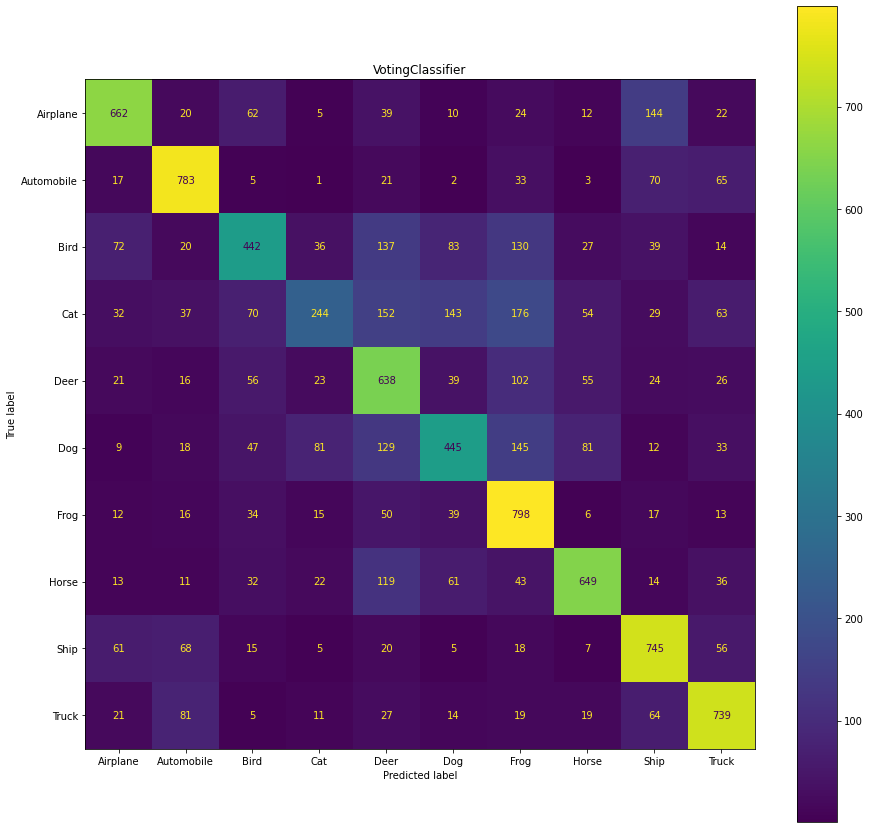

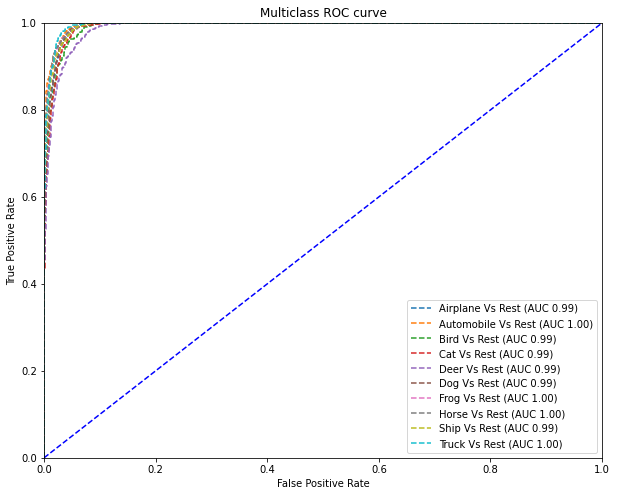


Predicted and Actual Test Set Results: 
Predicted Results: ['Cat', 'Ship', 'Ship', 'Airplane', 'Frog', 'Frog', 'Automobile', 'Frog', 'Cat', 'Automobile']
Actual Results: ['Cat', 'Ship', 'Automobile', 'Airplane', 'Deer', 'Frog', 'Frog', 'Frog', 'Cat', 'Automobile']

VotingClassifier(estimators=[('LGBM',
                              LGBMClassifier(learning_rate=0.02375374380489134,
                                             max_depth=11, min_child_samples=15,
                                             num_leaves=49, random_state=42,
                                             reg_alpha=0.16183089874674544)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   metric='manhattan',
                                                   n_neighbors=10))],
                 voting='soft') Accuracy :0.544260  (+/- 0.0006)  [                LGBM]   ||  233.37 seconds
VotingClassifier(

In [6]:
votingCLF1=ensemble_train_model('Voting_LGBMKNN',base_models_1,X_train,y_train,X_test,y_test,classes)

Voting Ensemble Classifier
----------------------------

Accuracy Score: 
Train Accuracy Score  :  70.1980%
Test Accuracy Score   :  61.1000%
Training Time         :  308.4716

Classification Report: 
              precision    recall  f1-score   support

    Airplane       0.70      0.67      0.68      1000
  Automobile       0.71      0.77      0.74      1000
        Bird       0.55      0.45      0.49      1000
         Cat       0.51      0.28      0.36      1000
        Deer       0.50      0.60      0.55      1000
         Dog       0.52      0.45      0.48      1000
        Frog       0.55      0.78      0.65      1000
       Horse       0.70      0.66      0.68      1000
        Ship       0.63      0.71      0.67      1000
       Truck       0.70      0.74      0.72      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.60     10000
weighted avg       0.61      0.61      0.60     10000


Confusion Matrix: 


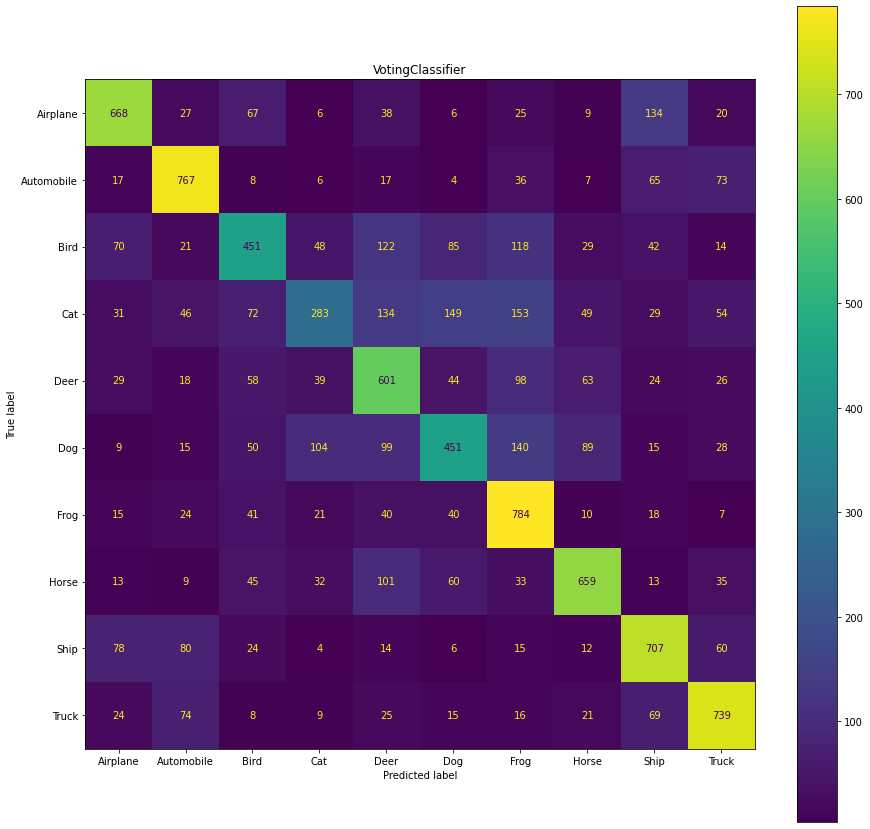

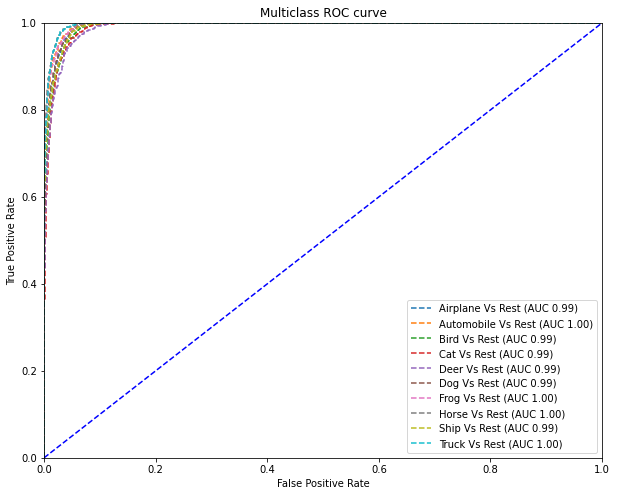


Predicted and Actual Test Set Results: 
Predicted Results: ['Cat', 'Ship', 'Ship', 'Airplane', 'Frog', 'Frog', 'Automobile', 'Frog', 'Cat', 'Automobile']
Actual Results: ['Cat', 'Ship', 'Automobile', 'Airplane', 'Frog', 'Frog', 'Frog', 'Frog', 'Cat', 'Automobile']

VotingClassifier(estimators=[('LGBM',
                              LGBMClassifier(learning_rate=0.02375374380489134,
                                             max_depth=11, min_child_samples=15,
                                             num_leaves=49, random_state=42,
                                             reg_alpha=0.16183089874674544)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   metric='manhattan',
                                                   n_neighbors=10)),
                             ('LR',
                              LogisticRegression(C=100, random_state=42,
                   

In [7]:
votingCLF2=ensemble_train_model('Voting_LGBMKNNLR',base_models_2,X_train,y_train,X_test,y_test,classes)

# Stacking Classifier

Stacking Ensemble Classifier
----------------------------

Accuracy Score: 
Train Accuracy Score  :  75.6840%
Test Accuracy Score   :  62.3900%
Training Time         :  3178.5696

Classification Report: 
              precision    recall  f1-score   support

    Airplane       0.69      0.67      0.68      1000
  Automobile       0.76      0.77      0.77      1000
        Bird       0.54      0.49      0.51      1000
         Cat       0.45      0.41      0.43      1000
        Deer       0.52      0.60      0.56      1000
         Dog       0.52      0.47      0.49      1000
        Frog       0.65      0.73      0.69      1000
       Horse       0.70      0.66      0.68      1000
        Ship       0.68      0.70      0.69      1000
       Truck       0.71      0.73      0.72      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000


Confusion Matrix: 


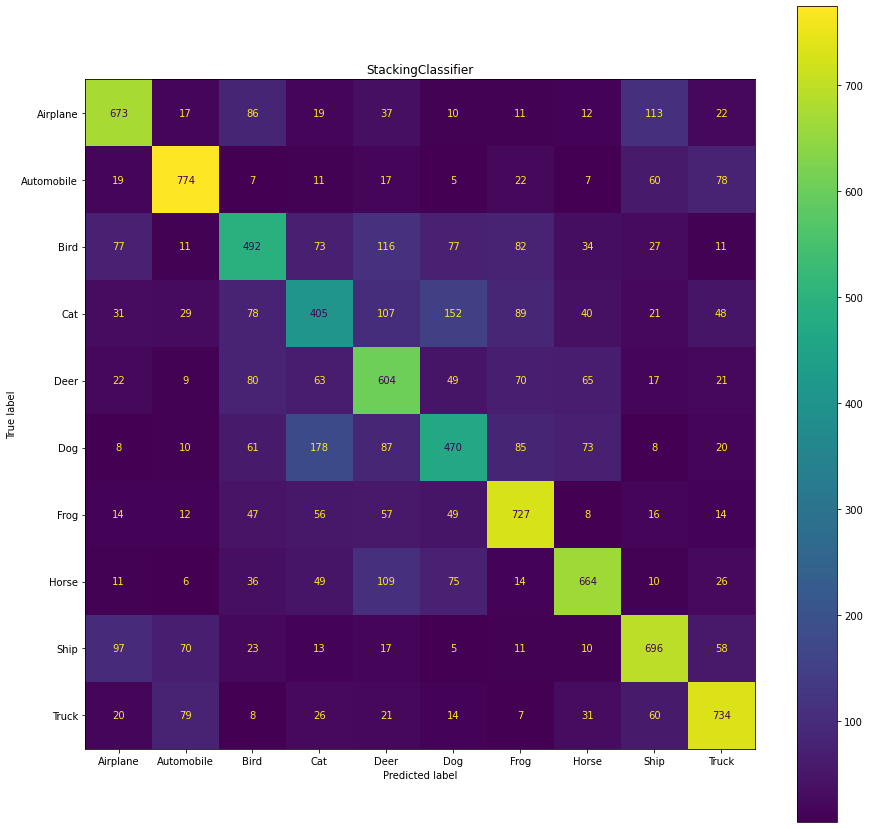

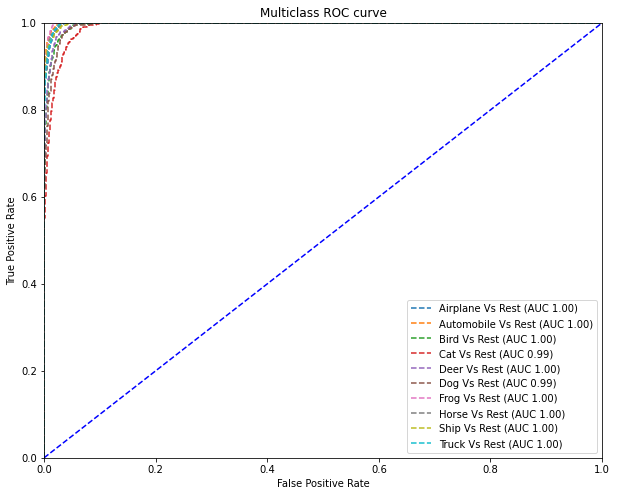


Predicted and Actual Test Set Results: 
Predicted Results: ['Cat', 'Ship', 'Ship', 'Airplane', 'Frog', 'Frog', 'Automobile', 'Frog', 'Cat', 'Automobile']
Actual Results: ['Cat', 'Ship', 'Automobile', 'Airplane', 'Deer', 'Frog', 'Frog', 'Frog', 'Cat', 'Automobile']

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.02375374380489134,
                                               max_depth=11,
                                               min_child_samples=15,
                                               num_leaves=49, random_state=42,
                                               reg_alpha=0.16183089874674544)),
                               ('KNN',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     metric='manhattan',
                                                     n_neighbors=10))]) Accuracy :0.544260  (+/- 0.0006)  [                LGBM]   || 

In [8]:
stackingCLF1=ensemble_train_model('Stacking_LGBMKNN',base_models_1,X_train,y_train,X_test,y_test,classes)

Stacking Ensemble Classifier
----------------------------

Accuracy Score: 
Train Accuracy Score  :  73.7400%
Test Accuracy Score   :  63.1100%
Training Time         :  2646.9815

Classification Report: 
              precision    recall  f1-score   support

    Airplane       0.70      0.69      0.69      1000
  Automobile       0.77      0.78      0.77      1000
        Bird       0.54      0.49      0.52      1000
         Cat       0.46      0.41      0.44      1000
        Deer       0.53      0.60      0.56      1000
         Dog       0.53      0.47      0.50      1000
        Frog       0.65      0.74      0.69      1000
       Horse       0.71      0.68      0.69      1000
        Ship       0.68      0.71      0.69      1000
       Truck       0.72      0.74      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000


Confusion Matrix: 


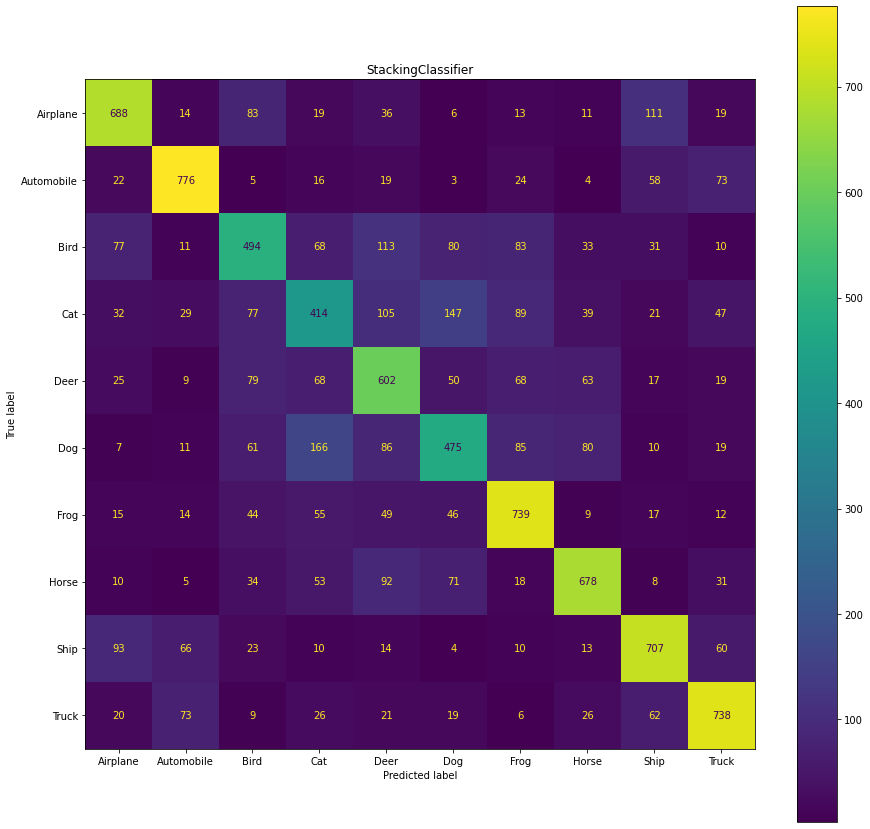

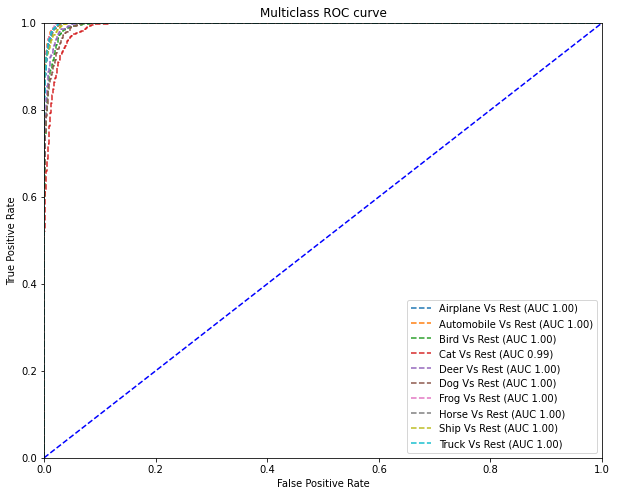


Predicted and Actual Test Set Results: 
Predicted Results: ['Cat', 'Ship', 'Ship', 'Airplane', 'Frog', 'Frog', 'Automobile', 'Frog', 'Cat', 'Automobile']
Actual Results: ['Cat', 'Ship', 'Automobile', 'Airplane', 'Frog', 'Frog', 'Frog', 'Frog', 'Cat', 'Automobile']

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.02375374380489134,
                                               max_depth=11,
                                               min_child_samples=15,
                                               num_leaves=49, random_state=42,
                                               reg_alpha=0.16183089874674544)),
                               ('KNN',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     metric='manhattan',
                                                     n_neighbors=10)),
                               ('LR',
                         

In [9]:
stackingCLF2=ensemble_train_model('Stacking_LGBMKNNLR',base_models_2,X_train,y_train,X_test,y_test,classes)

# Bagging

Bagging Ensemble Classifier
----------------------------

Accuracy Score: 
Train Accuracy Score  :  73.9980%
Test Accuracy Score   :  56.1500%
Training Time         :  1160.9724

Classification Report: 
              precision    recall  f1-score   support

    Airplane       0.62      0.62      0.62      1000
  Automobile       0.65      0.68      0.66      1000
        Bird       0.50      0.41      0.45      1000
         Cat       0.45      0.37      0.41      1000
        Deer       0.49      0.54      0.51      1000
         Dog       0.45      0.45      0.45      1000
        Frog       0.56      0.67      0.61      1000
       Horse       0.63      0.59      0.61      1000
        Ship       0.60      0.63      0.61      1000
       Truck       0.63      0.66      0.64      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000


Confusion Matrix: 


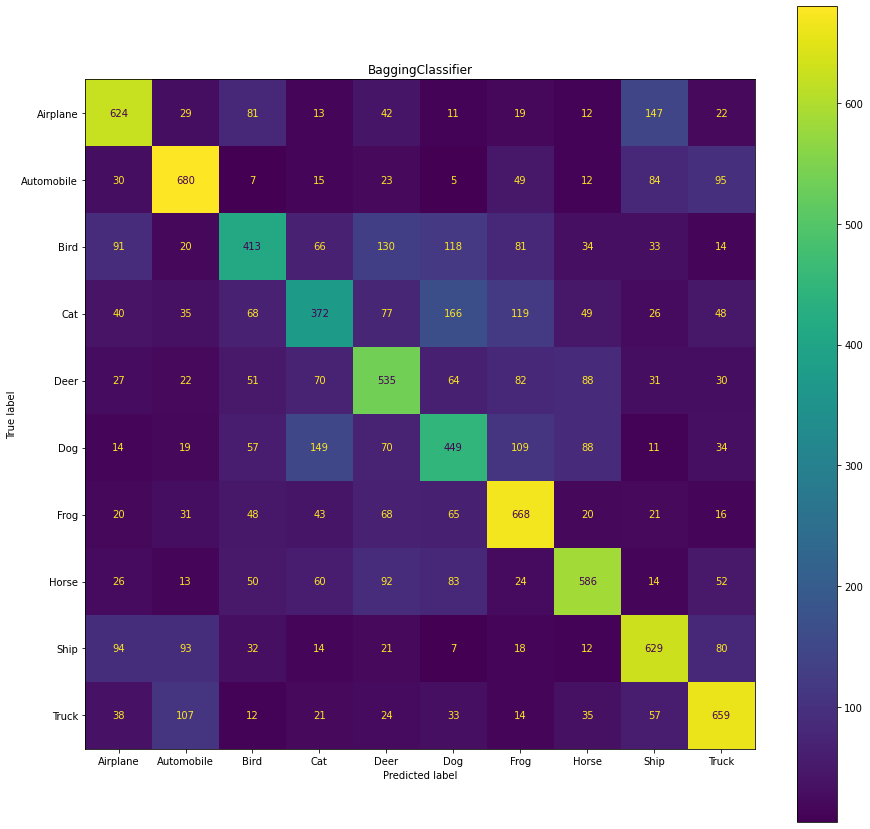

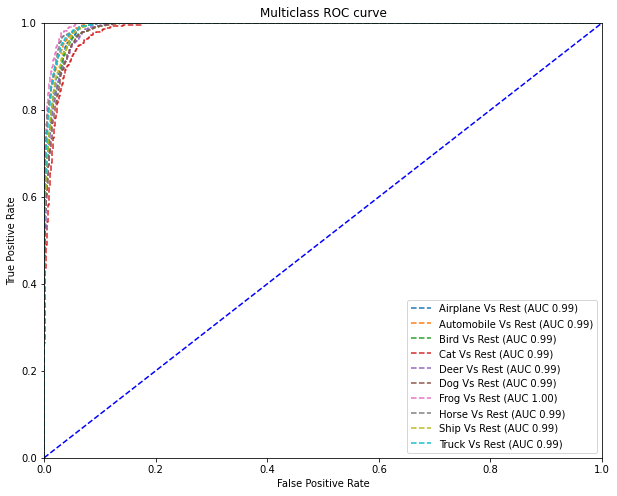


Predicted and Actual Test Set Results: 
Predicted Results: ['Cat', 'Ship', 'Ship', 'Airplane', 'Frog', 'Frog', 'Automobile', 'Frog', 'Cat', 'Automobile']
Actual Results: ['Cat', 'Ship', 'Automobile', 'Airplane', 'Frog', 'Frog', 'Dog', 'Frog', 'Cat', 'Automobile']

BaggingClassifier(base_estimator=LGBMClassifier(learning_rate=0.02375374380489134,
                                                max_depth=11,
                                                min_child_samples=15,
                                                num_leaves=49, random_state=42,
                                                reg_alpha=0.16183089874674544)) Accuracy :0.544260  (+/- 0.0006)  [                LGBM]   ||  152.35 seconds
BaggingClassifier(base_estimator=LGBMClassifier(learning_rate=0.02375374380489134,
                                                max_depth=11,
                                                min_child_samples=15,
                                                num_leaves=49, ran

In [10]:
baggingCLF=ensemble_train_model('Bagging_LGBM',base_models_1,X_train,y_train,X_test,y_test,classes,clf1)

# Plot Ensemble Results

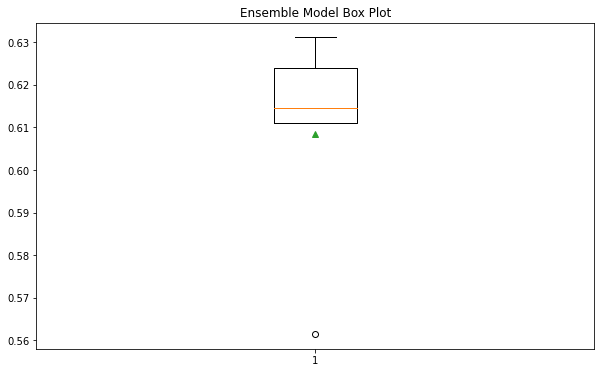

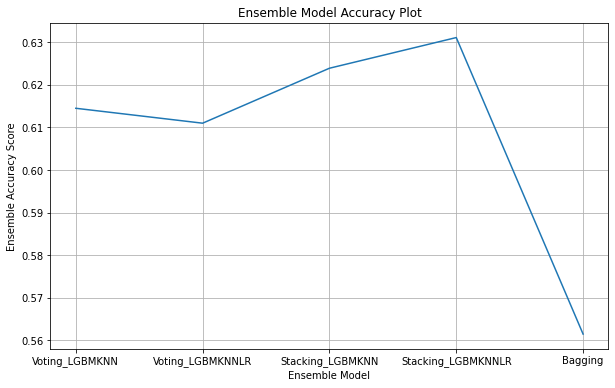

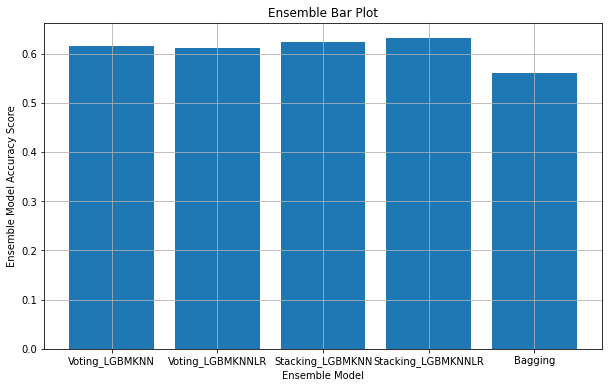

In [15]:
ensemble_plots(X_test,y_test)